In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import RSLPStemmer
nltk.download('rslp')

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/moncho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /Users/moncho/nltk_data...
[nltk_data]   Package rslp is already up-to-date!



ESTA VERSION:
DISCRETIZA target en 0 (negativo)y 1 (positivo)
maximo 300 palabras con mayor freq... ngram_range=(1,2)
y cambio test_size= 0.3 (antes 0.2).

In [3]:
Review = pd.read_csv('Datasets/olist_order_reviews_dataset.csv')

In [4]:
Review.dropna(subset = 'review_comment_message', inplace= True)


In [5]:
Review = Review[['review_score', 'review_comment_message', 'review_id']]

In [6]:
Review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40977 entries, 3 to 99223
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_score            40977 non-null  int64 
 1   review_comment_message  40977 non-null  object
 2   review_id               40977 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [7]:
Review

,review_score,review_comment_message,review_id
3,5,Recebi bem antes do prazo estipulado.,e64fb393e7b32834bb789ff8bb30750e
4,5,Parabéns lojas lannister adorei comprar pela I...,f7c4243c7fe1938f181bec41a392bdeb
9,4,aparelho eficiente. no site a marca do aparelh...,8670d52e15e00043ae7de4c01cc2fe06
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",4b49719c8a200003f700d3d986ea1a19
15,5,"Vendedor confiável, produto ok e entrega antes...",3948b09f7c818e2d86c9a546758b2335
...,...,...,...
99205,4,para este produto recebi de acordo com a compr...,98fffa80dc9acbde7388bef1600f3b15
99208,5,Entregou dentro do prazo. O produto chegou em ...,df5fae90e85354241d5d64a8955b2b09
99215,3,"O produto não foi enviado com NF, não existe v...",a709d176f59bc3af77f4149c96bae357
99221,5,"Excelente mochila, entrega super rápida. Super...",b3de70c89b1510c4cd3d0649fd302472


In [8]:
list_comment_message = Review['review_comment_message']

Comenzamos con el limpiado y transformacion del Dataframe

In [9]:
def remover_salto_de_linea(lista):
    return [re.sub('[\n\r]', ' ', r) for r in lista]
list_comment_message = remover_salto_de_linea(Review['review_comment_message'])
Review['review_comment_message'] = list_comment_message

In [10]:
Review['review_comment_message']

3                    Recebi bem antes do prazo estipulado.
4        Parabéns lojas lannister adorei comprar pela I...
9        aparelho eficiente. no site a marca do aparelh...
12           Mas um pouco ,travando...pelo valor ta Boa.  
15       Vendedor confiável, produto ok e entrega antes...
                               ...                        
99205    para este produto recebi de acordo com a compr...
99208    Entregou dentro do prazo. O produto chegou em ...
99215    O produto não foi enviado com NF, não existe v...
99221    Excelente mochila, entrega super rápida. Super...
99223    meu produto chegou e ja tenho que devolver, po...
Name: review_comment_message, Length: 40977, dtype: object

In [11]:
def remover_links(lista):
    pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return [re.sub(pattern, ' link ', r) for r in lista]
list_comment_message = remover_links(Review['review_comment_message'])
Review['review_comment_message'] = list_comment_message

In [12]:
def remover_fecha(lista):
    pattern = '([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}'
    return [re.sub(pattern, ' date ', r) for r in lista]
list_comment_message = remover_fecha(Review['review_comment_message'])
Review['review_comment_message'] = list_comment_message

In [13]:
def remover_moneda(lista):
    pattern = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    return [re.sub(pattern, ' money ', r) for r in lista]
list_comment_message = remover_moneda(Review['review_comment_message'])
Review['review_comment_message'] = list_comment_message

In [14]:
def remover_numeros(lista):
    return [re.sub('[0-9]+', ' number ', r) for r in lista]
list_comment_message = remover_numeros(Review['review_comment_message'])
Review['review_comment_message'] = list_comment_message

In [15]:
def remover_caracter_especial(lista):
    return [re.sub('\W', ' ', r) for r in lista]
list_comment_message = remover_caracter_especial(Review['review_comment_message'])
Review['review_comment_message'] = list_comment_message

In [16]:
def remover_espacios(text_list):
    white_spaces = [re.sub('\s+', ' ', r) for r in text_list]
    white_spaces_end = [re.sub('[ \t]+$', '', r) for r in white_spaces]
    return white_spaces_end
list_comment_message = remover_espacios(Review['review_comment_message'])
Review['review_comment_message'] = list_comment_message

In [17]:
#obs: spelling, sacar la l...en version final!
def remover_stopwords(texto):
    return [c.lower() for c in texto.split() if c.lower() not in stopwords.words('portuguese')]

list_comment_message = [' '.join(remover_stopwords(review)) for review in list_comment_message]
Review['review_comment_message'] = list_comment_message

In [18]:
#funcion para Stemmizar: 
def Busco_palabra_raiz(texto):
    stemmer=RSLPStemmer()
    return [stemmer.stem(c) for c in texto.split()]
    
list_comment_message = [' '.join(Busco_palabra_raiz(review)) for review in list_comment_message]
Review['review_comment_message']  = list_comment_message

Vectorizamos las palabras con la funcion de Scikit-Learn CountVectorizer

In [19]:
# Vectorizamos cada comentario, con las 300 palabras mas usadas: (eran 500 en el anterior!)

# Ver si aumentar o disminuir el max_features
count_vectorizer = CountVectorizer(max_features=300,ngram_range=(1,2), min_df=7) #sin max_df!

bag_of_words = count_vectorizer.fit_transform(list_comment_message)

#traigo los valores
feature_names = count_vectorizer.get_feature_names()

Vectorizado_message = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)
Vectorizado_message

/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,acab,ach,acontec,acord,ador,agor,aguard,aind,aind receb,algum,...,vc,vei,vend,vez,vier,volt,vou,ótim,ótim produt,ótim qual
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40972,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40974,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
40975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
Vectorizado_message.head(5)

,acab,ach,acontec,acord,ador,agor,aguard,aind,aind receb,algum,...,vc,vei,vend,vez,vier,volt,vou,ótim,ótim produt,ótim qual
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [21]:
#ACA SEPARO Y LO DISCRETIZO:
#  
# variable target 'review_score': 

#primero, creo una lista y la poblo segun la condicion: 4,5 ==1, 1,2,3==0.
#OBS: TAMB puedo probar con un valor neutro para 2 y 3!, o discretizar en -1, 0 y 1. .....
score0y1=[]
for row in Review['review_score']:
    if row in (4,5): score0y1.append(1)
    else: score0y1.append(0)
# la reescribo como la discreta, y entonces no tengo q cambiar nada de codigo abajo. 
Review['review_score']=score0y1

Nos traemos la columna review_score del Dataframe Review, donde se puede observar que gracias a las filas dropeadas el indice tiene saltos entre un número y otro.

In [ ]:
Review['review_score']

3        5
4        5
9        4
12       4
15       5
        ..
99205    4
99208    5
99215    3
99221    5
99223    1
Name: review_score, Length: 40977, dtype: int64

Eliminamos el indice anterior y creamos uno nuevo

In [22]:
Review.reset_index(drop = True, inplace=True)

In [23]:
Review

,review_score,review_comment_message,review_id
0,1,receb bem ant praz estipul,e64fb393e7b32834bb789ff8bb30750e
1,1,parabém loj lannist ador compr internet segur ...,f7c4243c7fe1938f181bec41a392bdeb
2,1,aparelh efici sit marc aparelh impress numb de...,8670d52e15e00043ae7de4c01cc2fe06
3,1,pouc trav val ta boa,4b49719c8a200003f700d3d986ea1a19
4,1,vend confi produt ok entreg ant praz,3948b09f7c818e2d86c9a546758b2335
...,...,...,...
40972,1,produt receb acord compr realiz,98fffa80dc9acbde7388bef1600f3b15
40973,1,entreg dentr praz produt cheg cond perfeit sat...,df5fae90e85354241d5d64a8955b2b09
40974,0,produt envi nf exist vend nf cert fic aguard e...,a709d176f59bc3af77f4149c96bae357
40975,1,excel mochil entreg sup rápid sup recom loj,b3de70c89b1510c4cd3d0649fd302472


In [24]:
Review['review_score'].value_counts()

5    20554
1     8745
4     5976
3     3557
2     2145
Name: review_score, dtype: int64

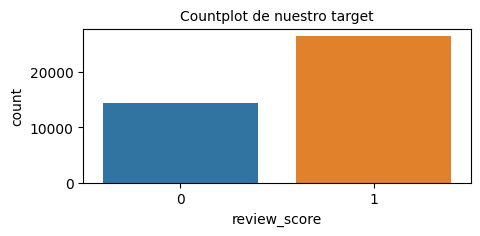

In [24]:
plt.figure(figsize=(5,2))
sns.countplot(x = 'review_score' ,label= 'Count', data = Review)
plt.title('Countplot de nuestro target', fontsize = 10)
plt.show()
# a mi parecer es demasiada discretizacion..... pero quiero ver si mejora el accuracy. 

In [25]:
Review.head(5)

,review_score,review_comment_message,review_id
0,1,receb bem ant praz estipul,e64fb393e7b32834bb789ff8bb30750e
1,1,parabém loj lannist ador compr internet segur ...,f7c4243c7fe1938f181bec41a392bdeb
2,1,aparelh efici sit marc aparelh impress numb de...,8670d52e15e00043ae7de4c01cc2fe06
3,1,pouc trav val ta boa,4b49719c8a200003f700d3d986ea1a19
4,1,vend confi produt ok entreg ant praz,3948b09f7c818e2d86c9a546758b2335


Hcemos una pequeña comparacion, Mirando 'a mano', checkeando que los indices esten iguales para llevar a cabo un join

In [26]:
#miramos 'a mano' checkeando que los indices esten iguales para join.
#En el primer registro:
Vectorizado_message[['receb', 'bem', 'ant', 'praz']].head(1)

,receb,bem,ant,praz
0,1,1,1,1


In [27]:
#en el 5to registro:
Vectorizado_message[['vend', 'confi', 'produt', 'ok', 'entreg', 'ant', 'praz']].head(5)

,vend,confi,produt,ok,entreg,ant,praz
0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1


Creamos el Dataframe final con toda la transformacion previamente hecha

In [28]:
Dataframe_final = Vectorizado_message.join(Review['review_score'])
Dataframe_final


,acab,ach,acontec,acord,ador,agor,aguard,aind,aind receb,algum,...,vei,vend,vez,vier,volt,vou,ótim,ótim produt,ótim qual,review_score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40972,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40974,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
40975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
#estrella_1 = Review[Review['review_score'] == 1]
#estrella_2 = Review[Review['review_score'] == 2]
#estrella_3 = Review[Review['review_score'] == 3]
#estrella_4 = Review[Review['review_score'] == 4]
#estrella_5 = Review[Review['review_score'] == 5]


AHORA SI ESTAMOS LISTO PARA CREAR Y TESTEAR MODELOS: 

Definimos nuestros datos 'X' para el modelo y el target 'y'.

In [29]:
#definimos el train y el target.
X = Dataframe_final.drop('review_score', axis=1)
y = Dataframe_final['review_score']

In [30]:
X

,acab,ach,acontec,acord,ador,agor,aguard,aind,aind receb,algum,...,vc,vei,vend,vez,vier,volt,vou,ótim,ótim produt,ótim qual
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40972,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40974,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
40975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Creamos los (x, y) train y los (x, y) test

In [31]:
# CAMBIO TEST SIZE A 0.3!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Probamos el modelo GussianNB y calculamos su accurancy

In [32]:
# podemos tomar el modelo Bayes como Benchmark: 
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB() #params?
nb.fit(X_train,y_train)
print("accuracy: ", nb.score(X_test,y_test))
# da accuracy :  0.5512445095168375
#accuracy:  0.8387831462502033 TAREGET DISCRETIZADO EN 0 Y 1. 


accuracy:  0.8387831462502033


Probamos el modelo K Neightbors Classifier y calculamos su accurancy

In [33]:
knn= KNeighborsClassifier(n_neighbors=100)

In [34]:
knn.fit(X = X_train, y= y_train)

KNeighborsClassifier(n_neighbors=100)

In [35]:
y_train_pred = knn.predict(X_test)

In [39]:
#funcion para plotear la conf matrix:

def confusion(y_test,y_pred):
    names=["0",'1']
    cm=confusion_matrix(y_test,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [40]:
#accuracy en TEST:
print("acc : ", knn.score(X_test,y_test)) #acc :  0.6082235236700829 (500words)
                                          #acc :  0.6127379209370425 (300words)
                                          #acc :  0.8177159590043924 DISCRETIZADO 0 Y 1. MENOS QUE EL BENCHMARK!
  

acc :  0.8177159590043924


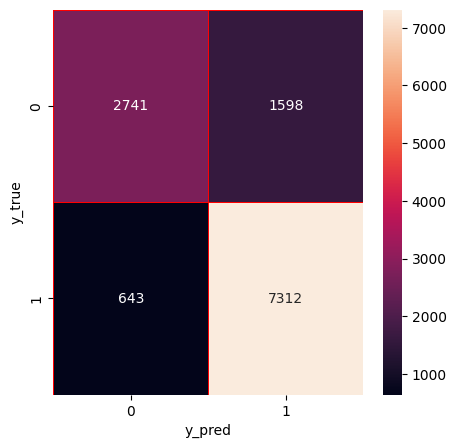

In [41]:
confusion(y_test,y_train_pred)

In [42]:
#recall:
recall = recall_score(y_test, y_train_pred, average='weighted') #sino no toma para classifier no binario. 
print(recall)  #0.6082235236700829... PERO ES ==AL ACCURACY????!! 0.6127379209370425 con 300w.

0.8177159590043924


In [43]:
#check OVERFITTING:
# Predecimos sobre nuestro set de entrenamiento

y_train_pred2 = knn.predict(X_train) #YA ESTA MAS ARRIBA EN REALIDAD.

# Predecimos sobre nuestro set de test

y_test_pred2 = knn.predict(X_test)  

# Comparamos con las etiquetas reales

print('Accuracy en Train:', accuracy_score(y_train_pred2,y_train))
print('Accuracy en Test:', accuracy_score(y_test_pred2,y_test))

#Accuracy en Train: 0.6189561026204203
#Accuracy en Test: 0.6082235236700829
# BASTANTE PAREJO!...
# con 300W :Accuracy en Train: 0.6245859917024021
           #Accuracy en Test: 0.6127379209370425

# DISCRETIZDO 0 Y 1, ngram (1,2). 300 w.    #Accuracy en Train: 0.826761496356727
                                            #Accuracy en Test: 0.8177159590043924        

Accuracy en Train: 0.826761496356727
Accuracy en Test: 0.8177159590043924


In [44]:
# correlation heatmap:
# NO FUNCIONA!, con 300 variables!....
'''vectorizada=Dataframe_final.drop('review_score', axis=1) #el conj
matr_corr = vectorizada.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(matr_corr, annot=True)'''

"vectorizada=Dataframe_final.drop('review_score', axis=1) #el conj\nmatr_corr = vectorizada.corr()\n\nplt.figure(figsize=(10, 8))\n\nsns.heatmap(matr_corr, annot=True)"

Probamos el modelo Linear SVC y calculamos su accurancy

In [44]:
#PRUEBO OTRO MODELO:
# Notar que en vez de utilizar SVC, vamos a usar LinearSVC. 
# Para el Kernel Lineal, esta función es MUCHO mas rapida que la tradicional SVC.
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8710753212949406

In [45]:
y_pred_svc=svc.predict(X_test)

In [46]:
#print('Accuracy en Train:', accuracy_score(y_train_pred2,y_train))
print('Accuracy en Test:', accuracy_score(y_pred_svc,y_test))
#Accuracy en Test: 0.6646331543842525 (300w)
#Accuracy en Test: 0.8710753212949406 DISCRETIZADO 0 Y 1. esta sii pasa el benchmark!


Accuracy en Test: 0.8710753212949406


In [47]:
print(classification_report(y_test, y_pred_svc))
# se observa como mejora mucho el modelo en cuando a los intermedios (2,3,4).

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      4339
           1       0.89      0.92      0.90      7955

    accuracy                           0.87     12294
   macro avg       0.86      0.85      0.86     12294
weighted avg       0.87      0.87      0.87     12294



PROBAMOS RandomForest, que nos permite conocer Feature Importance ademas: 

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 50, random_state=42)
rf.fit(X_train,y_train)
print("acc: ",rf.score(X_test,y_test))   #acc:  0.6493411420204978
                                         #acc:  0.6464128843338214 (300w)
                                         #acc:  0.8683910850821539 DISCRETIZADO 0 Y  1.  APENAS MENOS Q linearSVC.
   

acc:  0.8683910850821539


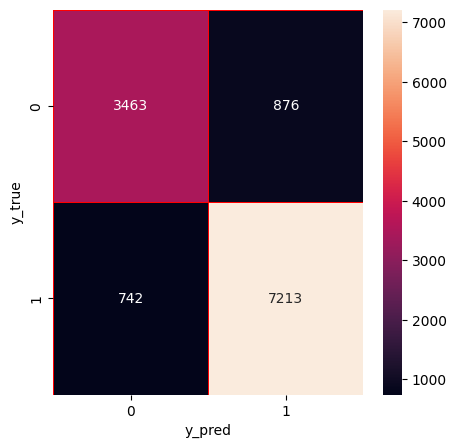

In [51]:
#Matriz de Confusion:
y_pred_rf=rf.predict(X_test)
confusion(y_test,y_pred_rf)

In [52]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4339
           1       0.89      0.91      0.90      7955

    accuracy                           0.87     12294
   macro avg       0.86      0.85      0.85     12294
weighted avg       0.87      0.87      0.87     12294



In [53]:
# importamos traductor para mayor comprension en esta etapa. 
# (no se traduce el archivo entero xq tarda mucho, entorpece, y ademas el origen seguira siendo en portugues.)
from deep_translator import GoogleTranslator
traductor = GoogleTranslator(source='pt', target='es')
# PARA TRADUCIR UNA LISTA: 
#selected_columns=[traductor.translate(palabra) for palabra in selected_columns]


Vemos features de importancia: es decir, que palabras tienen mayor peso:

/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


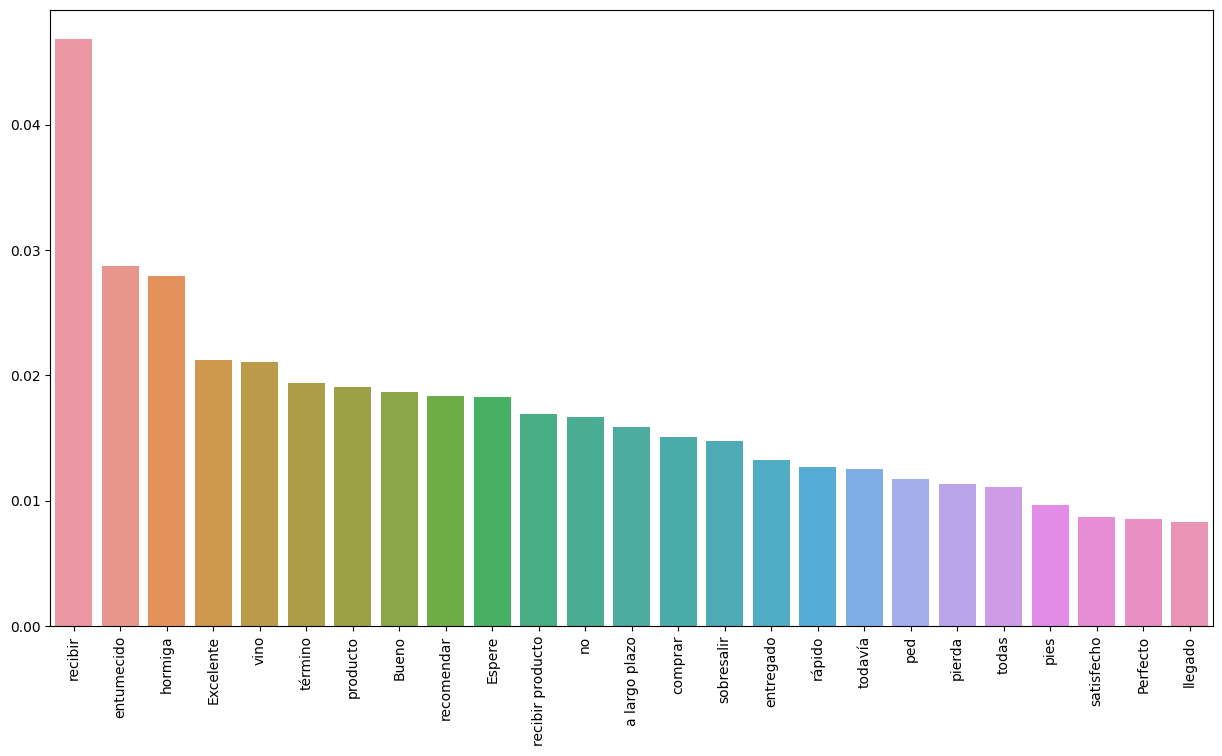

In [54]:
# VEMOS FEATURE IMPORTANCES: 
importances = rf.feature_importances_
# Tomamos la lista de palabras
all_words = count_vectorizer.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 25 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:25]   #traducir estas!!!! asi es mas comprensible!
#traducimos para entender facilmente: 

selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]
selected_columns_ES=[traductor.translate(palabra) for palabra in selected_columns]


# Ploteamos:
plt.figure(figsize = (15,8))
sns.barplot(x=selected_columns_ES, y=selected_importances)
plt.xticks(rotation=90)
plt.show()

Hasta aca, accuracy muy parecido para svc y rand forest. siendo svc bastante mas rapida. 

In [ ]:
# no parecen muy relevantes muchas de ellas. error de traduccion para un 3-gram?? 'a pesar de'....?
#AL MENOS SON BASTATNE PARECIDAS PARA CADA VARIANTE DE MODELO.... 



GRID SEARCH, CROSS VALIDATION:

In [ ]:
# hace falta un nuevo SPLIT??
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=60, stratify=y)

In [56]:
# CROOS VALIDATION SCORE con los modelos que ya tenemos: rf, y svc. 
rf_scores = cross_val_score(rf, X, y, cv=5)

svc_scores = cross_val_score(svc, X, y, cv=5)

/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [57]:
print(rf_scores)
print(svc_scores) #bastante parejos enre ellos mismo. 
#[0.65434358 0.65824793 0.65845027 0.66064674 0.65784015]
#[0.67801367 0.67593948 0.67614399 0.67516779 0.6738255 ] (500w)

#[0.65056125 0.65861396 0.65491153 0.65637584 0.65259304] (300w)
#[0.67545144 0.67349927 0.67431361 0.67394753 0.67089689]

[0.65056125 0.65861396 0.65491153 0.65637584 0.65259304]
[0.67545144 0.67349927 0.67431361 0.67394753 0.67089689]


In [72]:
rf_scores = cross_validate(rf, X, y, cv=5, scoring = ['precision','recall'])
svc_scores = cross_validate(svc, X, y, cv=5, scoring = ['precision','recall'])

/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py", line 1776, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/

In [73]:
print(rf_scores)
print(svc_scores) #practicamente no tienen precission y recall!

{'fit_time': array([4.19604897, 4.2672739 , 4.50140309, 4.01167059, 4.02358103]), 'score_time': array([0.160007  , 0.15513015, 0.16261792, 0.13197899, 0.13084698]), 'test_precision': array([nan, nan, nan, nan, nan]), 'test_recall': array([nan, nan, nan, nan, nan])}
{'fit_time': array([4.48698401, 4.98852706, 4.7771697 , 4.63716078, 4.88006997]), 'score_time': array([0.01182604, 0.01651597, 0.00821137, 0.02857709, 0.01156402]), 'test_precision': array([nan, nan, nan, nan, nan]), 'test_recall': array([nan, nan, nan, nan, nan])}


In [62]:
#random_grid para RForest: 

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [ ]:
# RANDOMIZED SEARCH, para RF:

#param_grid para RF: 
'''random_grid = {'n_neighbors':np.arange(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}'''

rf2=RandomForestClassifier()
# Le pasamos la grilla que creamos
random_rf = RandomizedSearchCV(rf2, param_distributions=random_grid, cv=3)

# Entrenamos
random_rf.fit(X_train, y_train) #

In [ ]:
print("Mejores hiperparámetros: "+str(random_rf.best_params_))
print("Mejor Score: "+str(random_rf.best_score_)+'\n')

scores = pd.DataFrame(random_rf.cv_results_)
scores

#Mejores hiperparámetros: {'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}
#Mejor Score: 0.6725237945821566

In [65]:
prediction = random_rf.predict(X_test)
# matriz confusion:
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[2272    0   25   23  286]
 [ 458    3   24   28  128]
 [ 467    9   45   57  514]
 [ 264    1   39   75 1472]
 [ 275    0   16   46 5767]]


In [66]:
print('accuracy:', accuracy_score(y_test, prediction))
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

accuracy: 0.6639010899625833
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.61      0.87      0.72      2606
           2       0.23      0.00      0.01       641
           3       0.30      0.04      0.07      1092
           4       0.33      0.04      0.07      1851
           5       0.71      0.94      0.81      6104

    accuracy                           0.66     12294
   macro avg       0.43      0.38      0.34     12294
weighted avg       0.57      0.66      0.57     12294



In [67]:
 #random grid para SVC:
   
    
losses = ["hinge", "squared_hinge"]
duals = [False, True]
learning_rates = [1e-15, 1e-8, 1e-4, 1e-2, 1e-1, 1]
penalties = ["l1", "l2"]
max_iters = [1000, 5000, 10000, 20000, 50000, 150000]

random_grid = {
        "C": learning_rates,
        "penalty": penalties,
        "max_iter": max_iters,
        "loss": losses,
        "dual": duals
    }

n_iter = 50



In [68]:
#Ahora un RandomSearch pero para linearSVM: 
svc2=LinearSVC()
random_svc = RandomizedSearchCV(svc2, param_distributions=random_grid, n_iter=n_iter, cv=3, n_jobs=-1, error_score=np.NINF)
# Entrenamos
random_svc.fit(X_train, y_train) # tardo:

/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to -inf.
If these f

RandomizedSearchCV(cv=3, error_score=-inf, estimator=LinearSVC(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'C': [1e-15, 1e-08, 0.0001, 0.01, 0.1,
                                              1],
                                        'dual': [False, True],
                                        'loss': ['hinge', 'squared_hinge'],
                                        'max_iter': [1000, 5000, 10000, 20000,
                                                     50000, 150000],
                                        'penalty': ['l1', 'l2']})

In [69]:
prediction = random_svc.predict(X_test)
# matriz confusion:
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)
best_params = random_svc.best_params_

Matriz de confusión:
[[2214    1   33   30  328]
 [ 457    3   19   33  129]
 [ 452    2   61   79  498]
 [ 237    0   32  103 1479]
 [ 217    0   25   51 5811]]


In [70]:
best_params

{'penalty': 'l1',
 'max_iter': 150000,
 'loss': 'squared_hinge',
 'dual': False,
 'C': 0.1}

In [71]:
print('accuracy:', accuracy_score(y_test, prediction))
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)
#accuracy: 0.6663413047014805
#best_params {'penalty': 'l1',
# 'max_iter': 150000,
# 'loss': 'squared_hinge',
# 'dual': False,
# 'C': 0.1}


accuracy: 0.6663413047014805
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.62      0.85      0.72      2606
           2       0.50      0.00      0.01       641
           3       0.36      0.06      0.10      1092
           4       0.35      0.06      0.10      1851
           5       0.70      0.95      0.81      6104

    accuracy                           0.67     12294
   macro avg       0.51      0.38      0.35     12294
weighted avg       0.59      0.67      0.58     12294



EN COLCUSION, si DISCRETIZAMOS nuestro TARGET, obtenemos un buen accuracy (acc: 0.877) para linearSVC con best_params_, pero igualmente se mantiene muy cercano al accuracy que obtuvimos con los parametros que probamos inicialmente.

Por otro lado, con RandomForest, (acc=0.879) tambien estamos al mismo nivel de accuracy que con SVC, incluso utilizando best_params_ .
